In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import models
from torchvision import transforms
from torchvision import datasets

import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
def to_cuda(x):
    return x.to(device)

# hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 64
learning_rate = 0.001

In [13]:
"""unzip the dataset"""
# import zipfile
#
# with zipfile.ZipFile("img_align_celeba.zip","r") as zip_ref:
#     zip_ref.extractall("data/")

In [11]:
import PIL.Image as Image

crop_size = 108
re_size = 64
offset_height = (218 - crop_size) // 2
offset_width = (178 - crop_size) // 2
crop = lambda x: x[:, offset_height:offset_height + crop_size, offset_width:offset_width + crop_size]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Lambda(crop),
     transforms.ToPILImage(),
     transforms.Scale(size=(re_size, re_size), interpolation=Image.BICUBIC),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])

batch_size = 64
celeba_data = datasets.ImageFolder('./data', transform=transform)
data_loader = DataLoader(celeba_data,batch_size=batch_size,shuffle=True)

C:\Anaconda\lib\site-packages\torchvision\transforms\transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [12]:
def show(img,renorm=False,nrow=8,interpolation='bicubic'):
    if renorm:
        img = img/2 + 0.5
    img_grid = torchvision.utils.make_grid(img,nrow=nrow).numpy()
    plt.figure()
    plt.imshow(np.transpose(img_grid, (1,2,0)), interpolation=interpolation)
    plt.axis('off')
    plt.show()

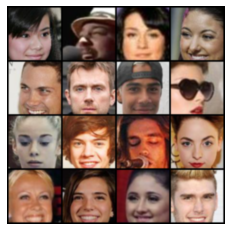

In [13]:
batch, _ = next(iter(data_loader))
show(batch[0:16], renorm = True, nrow=4)